In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def datagen():
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    return train_datagen,val_datagen

In [ ]:
def gen(train_datagen,val_datagen,data_dir):
    
    train_gen = train_datagen.flow_from_directory(
        data_dir,
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary',
        subset='training'
    )
    val_gen = val_datagen.flow_from_directory(
        data_dir,
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary',
        subset='validation'
    )
    return train_gen,val_gen

Found 777 images belonging to 2 classes.
Found 193 images belonging to 2 classes.


In [ ]:
def modelLayers():
    model1 = Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(258, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='softmax')
    ])
    
    model2 = Sequential([
    VGG16(include_top=False, input_shape=(150, 150, 3), weights='imagenet'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='softmax')
    ])
    
    model3 = Sequential([
    MobileNetV2(include_top=False, input_shape=(150, 150, 3), weights='imagenet'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='softmax')
    ])
    
    return model1,model2,model3

c:\Users\hisha\Desktop\New\RealvsFake\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
def compileModels(model1,model2,model3):
    model1.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    model2.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    model3.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

In [ ]:
def trainModels(model1,model2,model3,train_gen,val_gen):

    history1 = model1.fit(    
        train_gen,
        steps_per_epoch=len(train_gen),
        validation_data=val_gen,
        validation_steps=len(val_gen),
        epochs=10
    )
    history2 = model2.fit(    
    train_gen,
    steps_per_epoch=len(train_gen),
    validation_data=val_gen,
    validation_steps=len(val_gen),
    epochs=10
    )
    history3 = model3.fit(    
    train_gen,
    steps_per_epoch=len(train_gen),
    validation_data=val_gen,
    validation_steps=len(val_gen),
    epochs=10
    )
    
    return history1,history2,history3

c:\Users\hisha\Desktop\New\RealvsFake\myenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 1/13 ━━━━━━━━━━━━━━━━━━━━ 1:19 7s/step - accuracy: 0.5000 - loss: 0.6939

c:\Users\hisha\Desktop\New\RealvsFake\myenv\lib\site-packages\PIL\Image.py:1039: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 0.5302 - loss: 0.7040 - val_accuracy: 0.5544 - val_loss: 0.6846
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5521 - loss: 0.6912 - val_accuracy: 0.5544 - val_loss: 0.6759
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5521 - loss: 0.6738 - val_accuracy: 0.5544 - val_loss: 0.6450
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5508 - loss: 0.6760 - val_accuracy: 0.6010 - val_loss: 0.6825
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5586 - loss: 0.6824 - val_accuracy: 0.5544 - val_loss: 0.6543
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - accuracy: 0.5830 - loss: 0.6706 - val_accuracy: 0.6010 - val_loss: 0.6764
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.6396 - loss: 0.6552 - val_accuracy: 0.6477 - val_loss: 0.6280
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6525 - loss: 0.6208 - val_accuracy: 0.6425 - val_loss: 0.6147
Epo

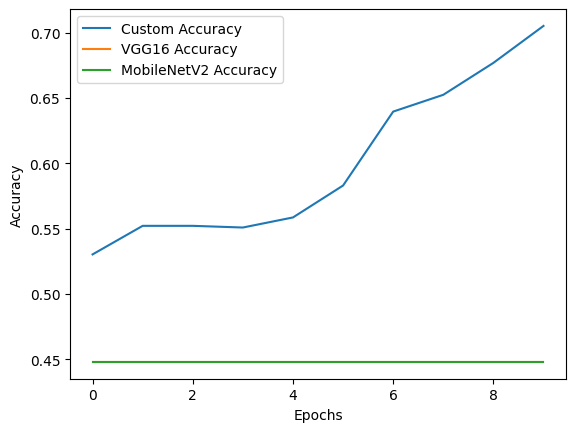

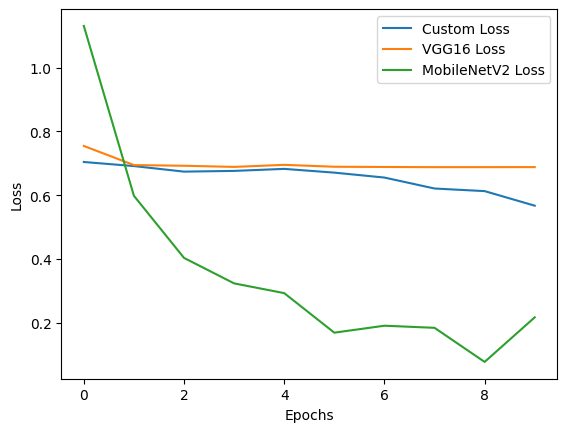

In [ ]:
def plotResults(history,history2,history3):
    plt.plot(history.history['accuracy'], label='Custom Accuracy')
    plt.plot(history2.history['accuracy'], label='VGG16 Accuracy')
    plt.plot(history3.history['accuracy'], label='MobileNetV2 Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Custom Loss')
    plt.plot(history2.history['loss'], label='VGG16 Loss')
    plt.plot(history3.history['loss'], label='MobileNetV2 Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [2]:
def main():  

    train_datgen,val_datagen=datagen()
    
    data_dir = './data'
    train_gen,val_gen=gen(train_datgen,val_datagen,data_dir)
    model1,model2,model3=modelLayers()
    compileModels(model1,model2,model3)
    history1,history2,history3=trainModels(model1,model2,model3,train_gen,val_gen)
    plotResults(history1,history2,history3)


    img_path = './test/test2.jpg'  
    img = image.load_img(img_path, target_size=(150, 150))  
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0  
    prediction = model1.predict(img_array)
    class_labels = ['AiArtData','RealArt']
    predicted_class = class_labels[np.argmax(prediction)]
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()



    data_dir = './data'